In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## Téléchargez, importez et nettoyez l'ensemble de données d'arbres ouverts

In [2]:
data = pd.read_csv('./data/arbres_grenoble_epsg4326(1).csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31779 entries, 0 to 31778
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          31779 non-null  int64  
 1   code                   31779 non-null  object 
 2   nom                    31779 non-null  object 
 3   genre                  31779 non-null  object 
 4   genre_desc             31779 non-null  object 
 5   categorie              31779 non-null  object 
 6   categorie_desc         31779 non-null  object 
 7   sous_categorie         31779 non-null  object 
 8   sous_categorie_desc    31779 non-null  object 
 9   code_parent            31779 non-null  object 
 10  code_parent_desc       31779 non-null  object 
 11  adr_secteur            31779 non-null  int64  
 12  bien_reference         31779 non-null  object 
 13  genre_bota             30983 non-null  object 
 14  espece                 29327 non-null  object 
 15  va

In [4]:
data.describe(include='all')

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
count,31779.000000,31779,31779,31779,31779,31779,31779,31779,31779,31779,...,0.0,0.0,31066,1896,20283,13989,30615,8603,13989,31779
unique,NaN,31779,31779,1,1,1,1,4,4,1484,...,NaN,NaN,2,2,3,7,4,3,7,31779
top,NaN,ESP27742,AR27742,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,Ville de Grenoble,Alignement,de 10 m à 20 m,Libre,Métropole de Grenoble,Tige,Libre,"45.170609213598304,5.741097829901726"
freq,NaN,1,1,31779,31779,31779,31779,15333,15333,375,...,NaN,NaN,15794,1780,9177,7942,14882,8009,7942,1
mean,20748.126813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13044.810792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9789.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,19671.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,29660.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for i in data.columns:
    if data[i].isnull().sum() >= len(data) / 2:
        data = data.drop(i,axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31779 entries, 0 to 31778
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elem_point_id         31779 non-null  int64  
 1   code                  31779 non-null  object 
 2   nom                   31779 non-null  object 
 3   genre                 31779 non-null  object 
 4   genre_desc            31779 non-null  object 
 5   categorie             31779 non-null  object 
 6   categorie_desc        31779 non-null  object 
 7   sous_categorie        31779 non-null  object 
 8   sous_categorie_desc   31779 non-null  object 
 9   code_parent           31779 non-null  object 
 10  code_parent_desc      31779 non-null  object 
 11  adr_secteur           31779 non-null  int64  
 12  bien_reference        31779 non-null  object 
 13  genre_bota            30983 non-null  object 
 14  espece                29327 non-null  object 
 15  stadededeveloppemen

In [7]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17617 entries, 0 to 31777
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elem_point_id         17617 non-null  int64  
 1   code                  17617 non-null  object 
 2   nom                   17617 non-null  object 
 3   genre                 17617 non-null  object 
 4   genre_desc            17617 non-null  object 
 5   categorie             17617 non-null  object 
 6   categorie_desc        17617 non-null  object 
 7   sous_categorie        17617 non-null  object 
 8   sous_categorie_desc   17617 non-null  object 
 9   code_parent           17617 non-null  object 
 10  code_parent_desc      17617 non-null  object 
 11  adr_secteur           17617 non-null  int64  
 12  bien_reference        17617 non-null  object 
 13  genre_bota            17617 non-null  object 
 14  espece                17617 non-null  object 
 15  stadededeveloppement  17

In [9]:
data.head()

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,adr_secteur,bien_reference,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,geo_point_2d
0,27452,ESP29627,AR29627,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP991,...,5,AR29627,Ginkgo,biloba,Arbre adulte,1965.0,Ville de Grenoble,de 10 m à 20 m,Ville de Grenoble,"45.18599541005583,5.736390702744254"
1,27458,ESP29628,AR29628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,5,AR29628,Platanus,acerifolia,Arbre adulte,1965.0,Ville de Grenoble,Plus de 20 m,Ville de Grenoble,"45.18535720117796,5.737112737684537"
2,27461,ESP29629,AR29629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,5,AR29629,Morus,nigra,Arbre vieillissant,1965.0,Ville de Grenoble,de 10 m à 20 m,Ville de Grenoble,"45.185699673347614,5.7377442387742645"
3,27467,ESP29630,AR29630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP843,...,5,AR29630,Taxus,baccata,Arbre vieillissant,1965.0,Ville de Grenoble,Moins de 10 m,Ville de Grenoble,"45.184868969286526,5.7364435192678584"
4,27470,ESP29631,AR29631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP614,...,5,AR29631,Acer,platanoides,Arbre adulte,1965.0,Ville de Grenoble,de 10 m à 20 m,Ville de Grenoble,"45.18493170028907,5.734850190386917"


In [10]:
data.describe(include='all')

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,adr_secteur,bien_reference,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,geo_point_2d
count,17617.000000,17617,17617,17617,17617,17617,17617,17617,17617,17617,...,17617.000000,17617,17617,17617,17617,17617.000000,17617,17617,17617,17617
unique,NaN,17617,17617,1,1,1,1,4,4,1358,...,NaN,17617,102,228,3,NaN,2,3,4,17617
top,NaN,ESP27741,AR27741,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP495,...,NaN,AR27741,Platanus,acerifolia,Arbre adulte,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Métropole de Grenoble,"45.167433401965766,5.741630980486011"
freq,NaN,1,1,17617,17617,17617,17617,8828,8828,240,...,NaN,1,2710,2467,13643,NaN,9734,8684,9723,1
mean,16640.527048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,207.374354,NaN,NaN,NaN,NaN,1988.511268,NaN,NaN,NaN,NaN
std,10163.506492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2779.192348,NaN,NaN,NaN,NaN,16.785201,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,1924.000000,NaN,NaN,NaN,NaN
25%,8059.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,1975.000000,NaN,NaN,NaN,NaN
50%,16283.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,NaN,NaN,NaN,NaN,1985.000000,NaN,NaN,NaN,NaN
75%,24295.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN


In [11]:
for i in data.columns:
    if len(data[i].unique()) == 1:
        data = data.drop(i,axis=1)

In [12]:
data.describe(include='all')

,elem_point_id,code,nom,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,geo_point_2d
count,17617.000000,17617,17617,17617,17617,17617,17617,17617.000000,17617,17617,17617,17617,17617.000000,17617,17617,17617,17617
unique,NaN,17617,17617,4,4,1358,1358,NaN,17617,102,228,3,NaN,2,3,4,17617
top,NaN,ESP27741,AR27741,ESP174,Arbre d'espaces ouverts,ESP495,Cimetière St Roch,NaN,AR27741,Platanus,acerifolia,Arbre adulte,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Métropole de Grenoble,"45.167433401965766,5.741630980486011"
freq,NaN,1,1,8828,8828,240,240,NaN,1,2710,2467,13643,NaN,9734,8684,9723,1
mean,16640.527048,NaN,NaN,NaN,NaN,NaN,NaN,207.374354,NaN,NaN,NaN,NaN,1988.511268,NaN,NaN,NaN,NaN
std,10163.506492,NaN,NaN,NaN,NaN,NaN,NaN,2779.192348,NaN,NaN,NaN,NaN,16.785201,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1924.000000,NaN,NaN,NaN,NaN
25%,8059.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1975.000000,NaN,NaN,NaN,NaN
50%,16283.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1985.000000,NaN,NaN,NaN,NaN
75%,24295.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN


In [13]:
data = data.set_index('code')

In [14]:
data = data.drop(['nom','bien_reference'],axis=1)

In [15]:
data.describe(include='all')

,elem_point_id,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,geo_point_2d
count,17617.000000,17617,17617,17617,17617,17617.000000,17617,17617,17617,17617.000000,17617,17617,17617,17617
unique,NaN,4,4,1358,1358,NaN,102,228,3,NaN,2,3,4,17617
top,NaN,ESP174,Arbre d'espaces ouverts,ESP495,Cimetière St Roch,NaN,Platanus,acerifolia,Arbre adulte,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Métropole de Grenoble,"45.167433401965766,5.741630980486011"
freq,NaN,8828,8828,240,240,NaN,2710,2467,13643,NaN,9734,8684,9723,1
mean,16640.527048,NaN,NaN,NaN,NaN,207.374354,NaN,NaN,NaN,1988.511268,NaN,NaN,NaN,NaN
std,10163.506492,NaN,NaN,NaN,NaN,2779.192348,NaN,NaN,NaN,16.785201,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1924.000000,NaN,NaN,NaN,NaN
25%,8059.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1975.000000,NaN,NaN,NaN,NaN
50%,16283.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,1985.000000,NaN,NaN,NaN,NaN
75%,24295.000000,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17617 entries, ESP29627 to ESP27741
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elem_point_id         17617 non-null  int64  
 1   sous_categorie        17617 non-null  object 
 2   sous_categorie_desc   17617 non-null  object 
 3   code_parent           17617 non-null  object 
 4   code_parent_desc      17617 non-null  object 
 5   adr_secteur           17617 non-null  int64  
 6   genre_bota            17617 non-null  object 
 7   espece                17617 non-null  object 
 8   stadededeveloppement  17617 non-null  object 
 9   anneedeplantation     17617 non-null  float64
 10  collectivite          17617 non-null  object 
 11  hauteurarbre          17617 non-null  object 
 12  structure             17617 non-null  object 
 13  geo_point_2d          17617 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.0+ MB


## Enquêter sur la structure des données et visualiser les données pour mieux les comprendre

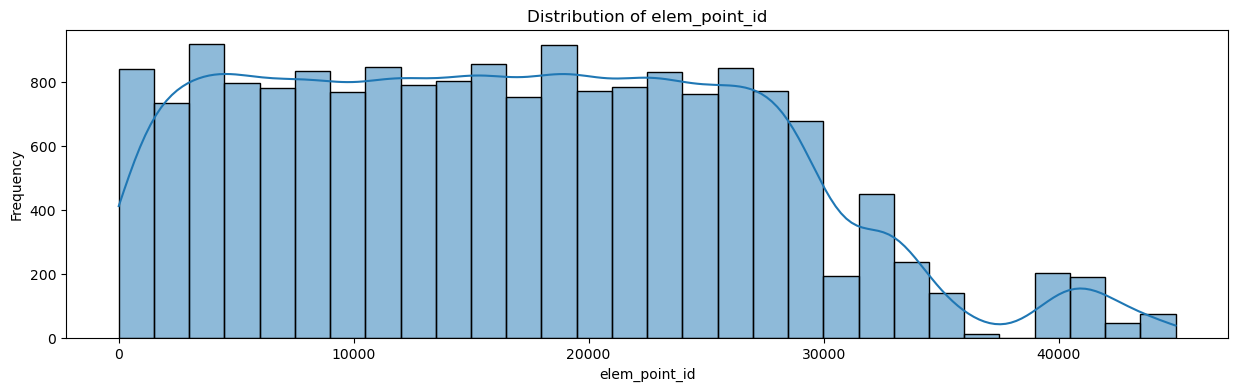

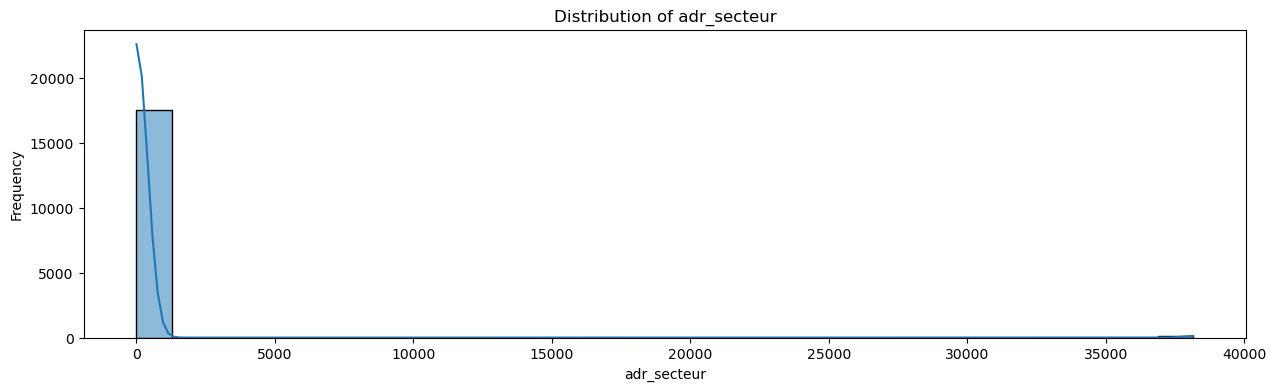

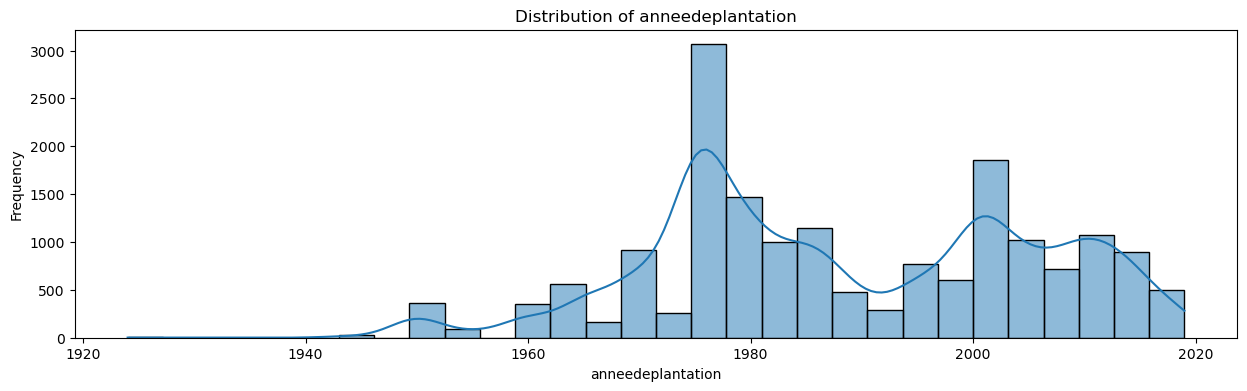

In [17]:
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype == 'float64':
        plt.figure(figsize=(15,4))
        sns.histplot(data,x=data[i],bins=30,kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()

In [18]:
data['elem_point_id'].dtype

dtype('int64')

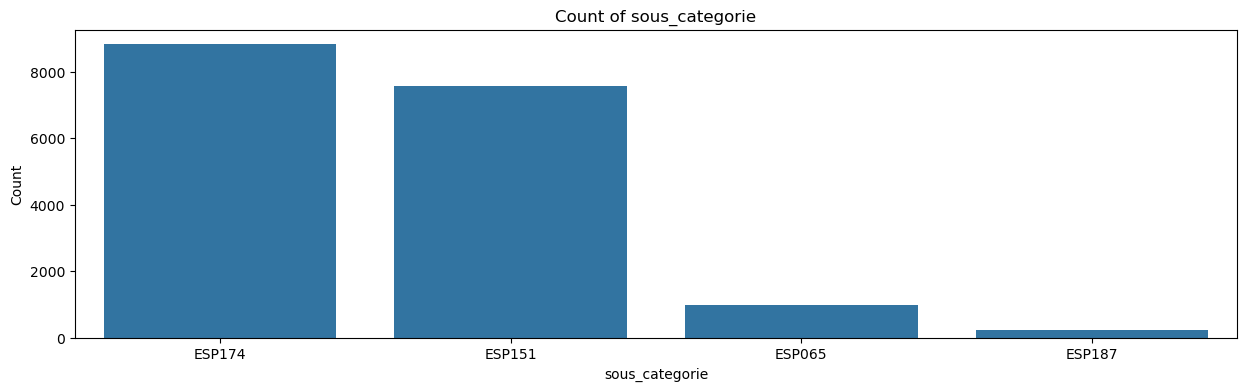

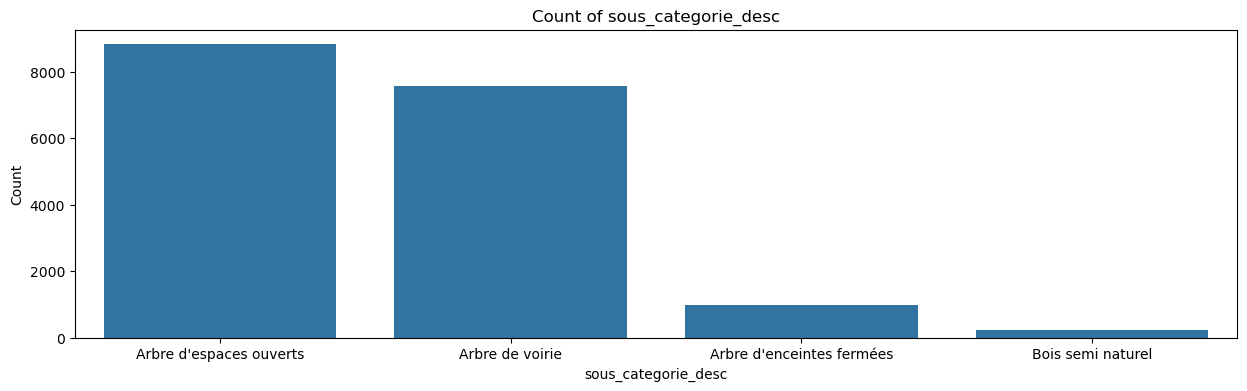

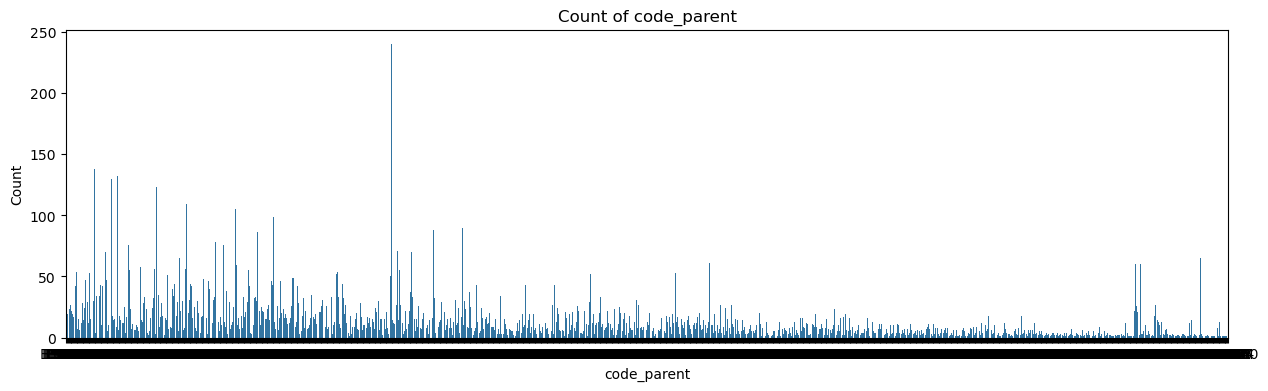

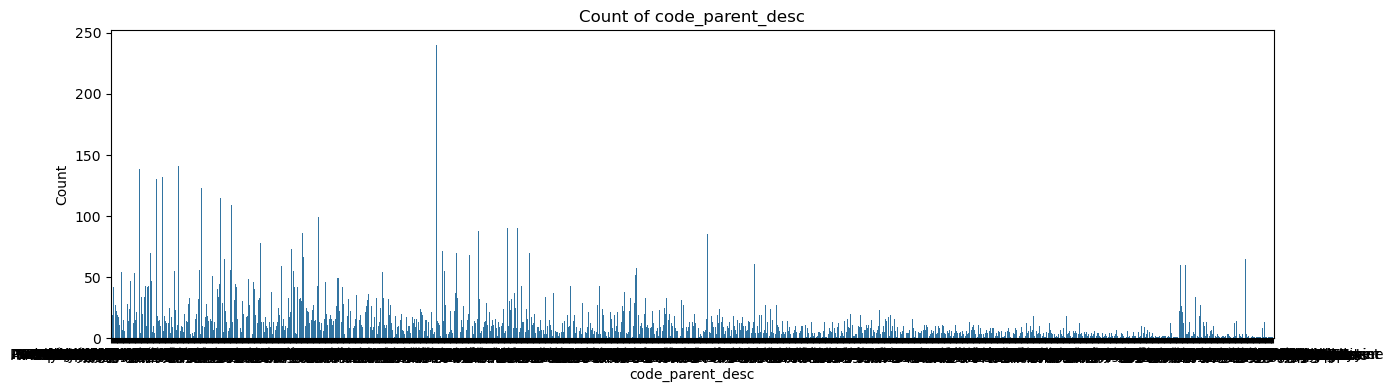

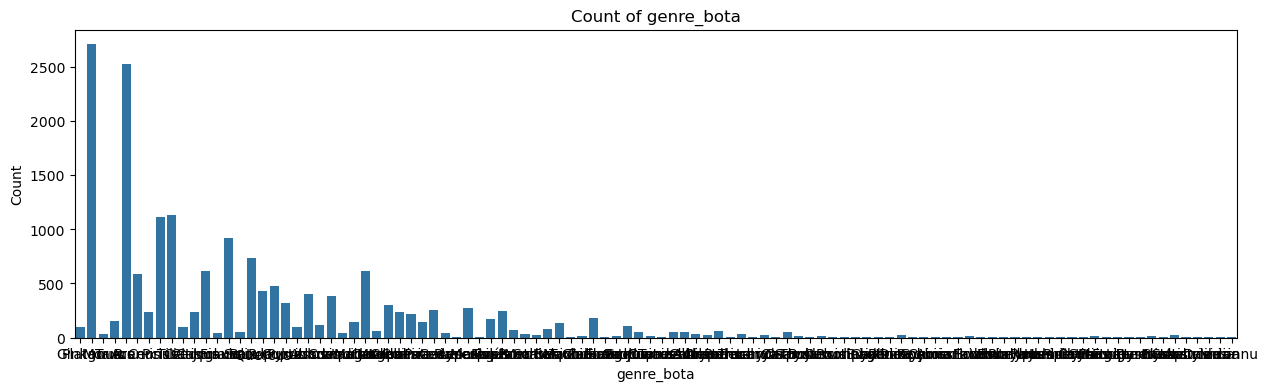

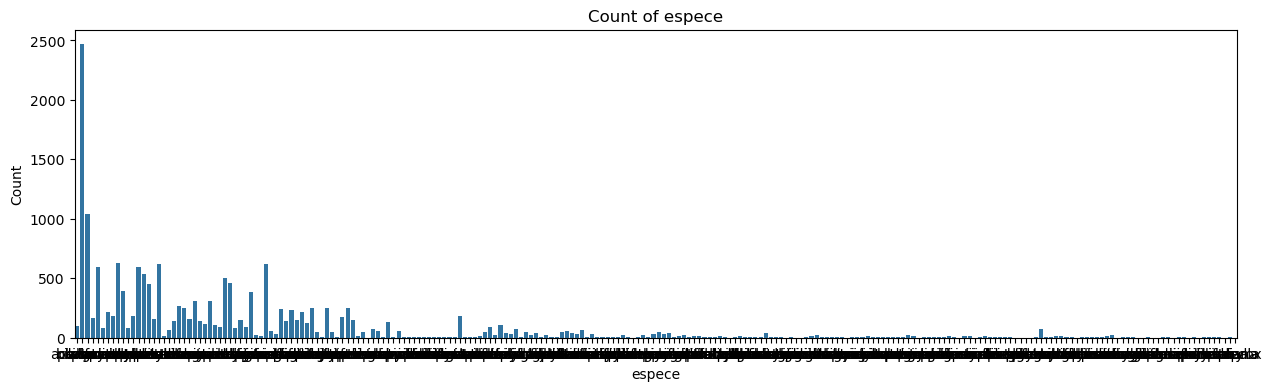

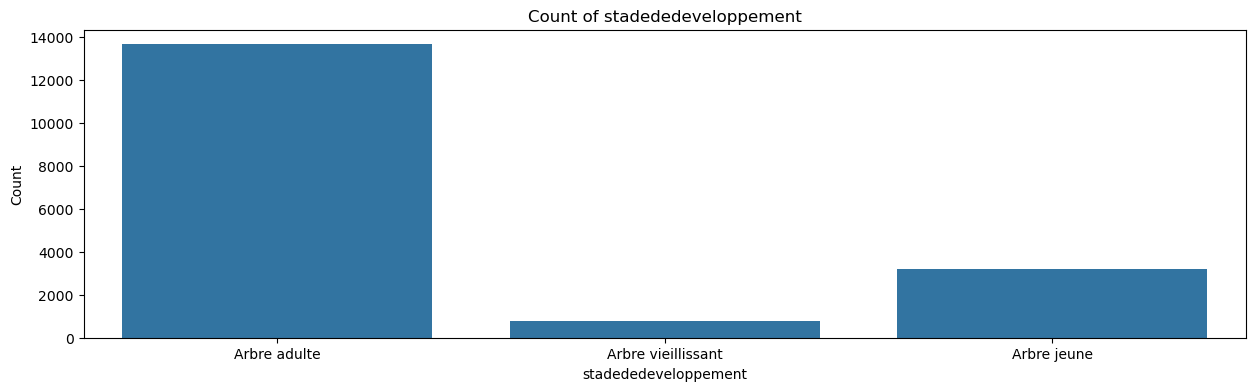

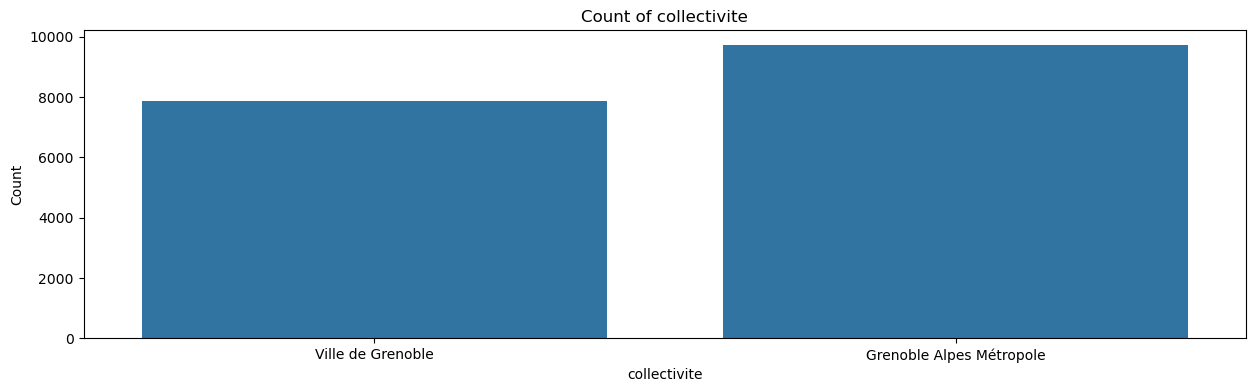

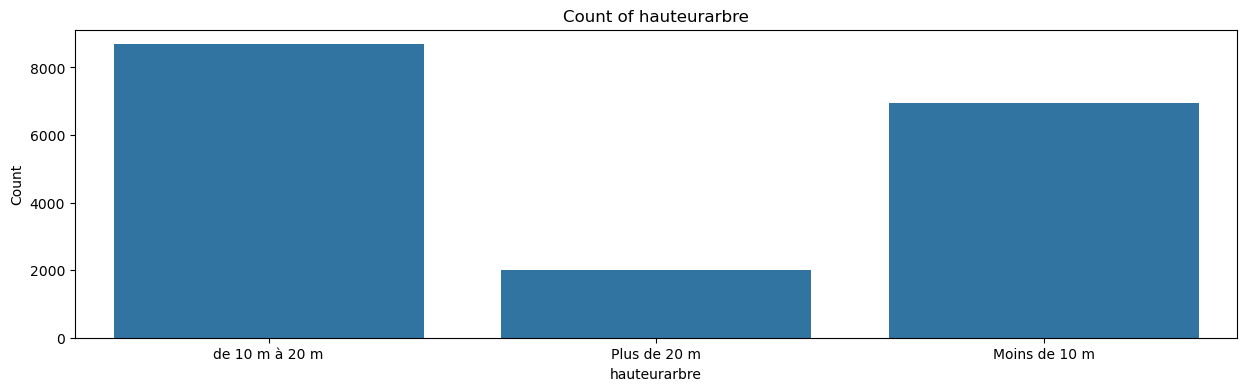

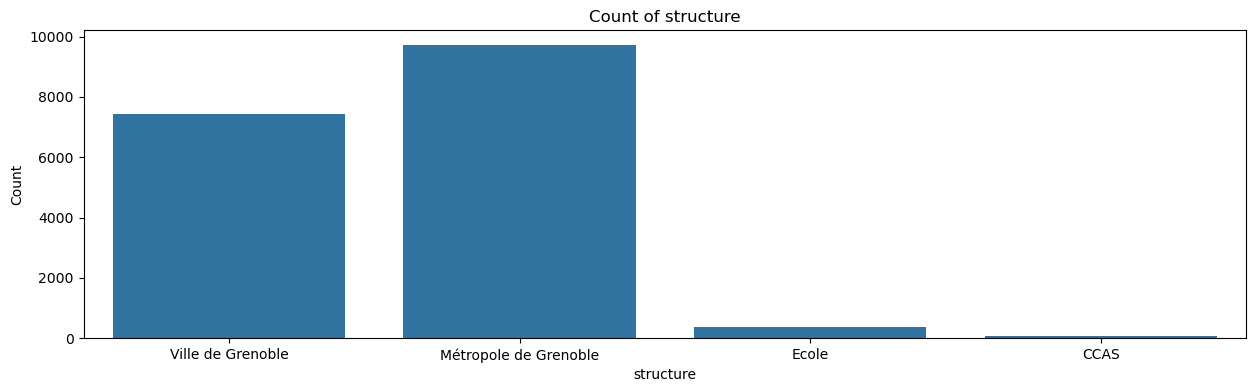

In [19]:
for i in data.columns:
    if data[i].dtype != 'int64' and data[i].dtype != 'float64' and len(data[i].unique()) < len(data):
        plt.figure(figsize=(15,4))
        sns.countplot(data,x=data[i])
        plt.title(f'Count of {i}')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17617 entries, ESP29627 to ESP27741
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elem_point_id         17617 non-null  int64  
 1   sous_categorie        17617 non-null  object 
 2   sous_categorie_desc   17617 non-null  object 
 3   code_parent           17617 non-null  object 
 4   code_parent_desc      17617 non-null  object 
 5   adr_secteur           17617 non-null  int64  
 6   genre_bota            17617 non-null  object 
 7   espece                17617 non-null  object 
 8   stadededeveloppement  17617 non-null  object 
 9   anneedeplantation     17617 non-null  float64
 10  collectivite          17617 non-null  object 
 11  hauteurarbre          17617 non-null  object 
 12  structure             17617 non-null  object 
 13  geo_point_2d          17617 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.5+ MB


In [21]:
data = data[data.adr_secteur <= 3000]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17523 entries, ESP29627 to ESP27741
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elem_point_id         17523 non-null  int64  
 1   sous_categorie        17523 non-null  object 
 2   sous_categorie_desc   17523 non-null  object 
 3   code_parent           17523 non-null  object 
 4   code_parent_desc      17523 non-null  object 
 5   adr_secteur           17523 non-null  int64  
 6   genre_bota            17523 non-null  object 
 7   espece                17523 non-null  object 
 8   stadededeveloppement  17523 non-null  object 
 9   anneedeplantation     17523 non-null  float64
 10  collectivite          17523 non-null  object 
 11  hauteurarbre          17523 non-null  object 
 12  structure             17523 non-null  object 
 13  geo_point_2d          17523 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.0+ MB


In [23]:
data.geo_point_2d

code
ESP29627      45.18599541005583,5.736390702744254
ESP29628      45.18535720117796,5.737112737684537
ESP29629    45.185699673347614,5.7377442387742645
ESP29630    45.184868969286526,5.7364435192678584
ESP29631      45.18493170028907,5.734850190386917
                            ...                  
ESP27737      45.18305703380721,5.735065813246526
ESP27738     45.183034220591935,5.735577673559971
ESP27739      45.18351698514722,5.735315763957461
ESP27740      45.18437975945701,5.735769288203197
ESP27741     45.167433401965766,5.741630980486011
Name: geo_point_2d, Length: 17523, dtype: object

In [24]:
data[['lat','lon']] = data.geo_point_2d.str.split(',',expand=True)

In [25]:
data['lat'] = data['lat'].astype(float)
data['lon'] = data['lon'].astype(float)

In [26]:
data = data.drop('geo_point_2d',axis=1)

In [27]:
data.head()

,elem_point_id,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,lat,lon
code,,,,,,,,,,,,,,,
ESP29627,27452,ESP174,Arbre d'espaces ouverts,ESP991,Prc Mis dans vivaces Mairie,5,Ginkgo,biloba,Arbre adulte,1965.0,Ville de Grenoble,de 10 m à 20 m,Ville de Grenoble,45.185995,5.736391
ESP29628,27458,ESP174,Arbre d'espaces ouverts,ESP22,Prc Mis pelouses de la famille,5,Platanus,acerifolia,Arbre adulte,1965.0,Ville de Grenoble,Plus de 20 m,Ville de Grenoble,45.185357,5.737113
ESP29629,27461,ESP174,Arbre d'espaces ouverts,ESP22,Prc Mis pelouses de la famille,5,Morus,nigra,Arbre vieillissant,1965.0,Ville de Grenoble,de 10 m à 20 m,Ville de Grenoble,45.185700,5.737744
ESP29630,27467,ESP174,Arbre d'espaces ouverts,ESP843,Prc Mis pelses du koster,5,Taxus,baccata,Arbre vieillissant,1965.0,Ville de Grenoble,Moins de 10 m,Ville de Grenoble,45.184869,5.736444
ESP29631,27470,ESP174,Arbre d'espaces ouverts,ESP614,Prc Mis Mail bd Ouest t Perret,5,Acer,platanoides,Arbre adulte,1965.0,Ville de Grenoble,de 10 m à 20 m,Ville de Grenoble,45.184932,5.734850


## Preparing categorical values

In [28]:
data.describe(include = 'all')

,elem_point_id,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,lat,lon
count,17523.000000,17523,17523,17523,17523,17523.000000,17523,17523,17523,17523.000000,17523,17523,17523,17523.000000,17523.000000
unique,NaN,4,4,1356,1356,NaN,102,228,3,NaN,2,3,4,NaN,NaN
top,NaN,ESP174,Arbre d'espaces ouverts,ESP495,Cimetière St Roch,NaN,Platanus,acerifolia,Arbre adulte,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Métropole de Grenoble,NaN,NaN
freq,NaN,8828,8828,240,240,NaN,2650,2409,13549,NaN,9640,8629,9629,NaN,NaN
mean,16633.063060,NaN,NaN,NaN,NaN,3.826799,NaN,NaN,NaN,1988.554357,NaN,NaN,NaN,45.177446,5.727024
std,10172.998259,NaN,NaN,NaN,NaN,1.734411,NaN,NaN,NaN,16.819477,NaN,NaN,NaN,0.011765,0.012203
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1924.000000,NaN,NaN,NaN,45.154848,5.697915
25%,8049.500000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1975.000000,NaN,NaN,NaN,45.166399,5.717656
50%,16253.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,45.176535,5.728349
75%,24289.500000,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,45.186434,5.737152


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [32]:
data.head()

,elem_point_id,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,lat,lon
code,,,,,,,,,,,,,,,
ESP29627,27452,2,1,1347,777,5,41,27,0,1965.0,1,2,3,45.185995,5.736391
ESP29628,27458,2,1,518,795,5,73,2,0,1965.0,1,1,3,45.185357,5.737113
ESP29629,27461,2,1,518,795,5,62,127,2,1965.0,1,2,3,45.185700,5.737744
ESP29630,27467,2,1,1193,796,5,94,23,2,1965.0,1,0,3,45.184869,5.736444
ESP29631,27470,2,1,959,766,5,1,155,0,1965.0,1,2,3,45.184932,5.734850


In [33]:
data = data.drop(['code_parent_desc','sous_categorie_desc'],axis=1)

In [34]:
data.head()

,elem_point_id,sous_categorie,code_parent,adr_secteur,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,structure,lat,lon
code,,,,,,,,,,,,,
ESP29627,27452,2,1347,5,41,27,0,1965.0,1,2,3,45.185995,5.736391
ESP29628,27458,2,518,5,73,2,0,1965.0,1,1,3,45.185357,5.737113
ESP29629,27461,2,518,5,62,127,2,1965.0,1,2,3,45.185700,5.737744
ESP29630,27467,2,1193,5,94,23,2,1965.0,1,0,3,45.184869,5.736444
ESP29631,27470,2,959,5,1,155,0,1965.0,1,2,3,45.184932,5.734850


## Pipeline it

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class Cleaner(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value=0):
        """
        Initialize
        """
        self.fill_value = fill_value

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        # Make a copy of the DataFrame to avoid modifying the original
        data = X.copy()

        # Remove columns with more than 50% missing values
        for col in data.columns:
            if data[col].isnull().sum() >= len(data) / 2:
                data = data.drop(col, axis=1)

        # Remove columns with only one unique value
        for col in data.columns:
            if len(data[col].unique()) == 1:
                data = data.drop(col, axis=1)

        # Filter outliers for numerical columns
        for col in data.select_dtypes(include=['int64', 'float64']).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers with NaN
            data[col] = data[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

        # Fill remaining NaN values with the specified fill value
        data = data.dropna()
        
        # Preparing categorical values
        le = LabelEncoder()
        
        for i in data.select_dtypes(include=['object']).columns:
            data[i] = le.fit_transform(data[i])

        return pd.DataFrame(data)

In [37]:
class Separator:
    def __init__(self, fill_value=0):
        """
        Initialize
        """
        self.fill_value = fill_value

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        # Make a copy of the DataFrame to avoid modifying the original
        data = X.copy()

        return pd.DataFrame(data.drop('anneedeplantation',axis=1))

In [38]:
data = pd.read_csv('./data/arbres_grenoble_epsg4326(1).csv')

In [39]:
data.head()

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,27452,ESP29627,AR29627,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP991,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,Tige,Libre,"45.18599541005583,5.736390702744254"
1,27458,ESP29628,AR29628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,NaN,NaN,Ville de Grenoble,NaN,Plus de 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.18535720117796,5.737112737684537"
2,27461,ESP29629,AR29629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.185699673347614,5.7377442387742645"
3,27467,ESP29630,AR29630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP843,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,Libre,Ville de Grenoble,NaN,Libre,"45.184868969286526,5.7364435192678584"
4,27470,ESP29631,AR29631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP614,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,Tige,Libre,"45.18493170028907,5.734850190386917"


In [40]:
from sklearn.preprocessing import StandardScaler

pipeline_clean = Pipeline([
    ('clean',Cleaner())
])

pipeline_all = Pipeline([
    ('clean',Cleaner()),
    ('sep',Separator()),
    ('std_scaler', StandardScaler())
])

In [43]:
y = pd.DataFrame(pipeline_clean.fit_transform(data)).pop('anneedeplantation')

X = pd.DataFrame(pipeline_all.fit_transform(data), columns=pd.DataFrame(pipeline_clean.fit_transform(data)).drop('anneedeplantation',axis=1).columns)

X = X.drop(['sous_categorie_desc','code_parent_desc','bien_reference','nom'],axis=1)

In [44]:
X.head()

,elem_point_id,code,sous_categorie,code_parent,adr_secteur,genre_bota,espece,stadededeveloppement,collectivite,hauteurarbre,structure,geo_point_2d
0,1.063394,0.509433,0.844353,1.633683,0.676272,-0.229747,-1.001792,-0.506894,1.106052,0.962826,1.0926,0.807994
1,1.063984,0.509630,0.844353,-0.497662,0.676272,0.730120,-1.331419,-0.506894,1.106052,-0.105287,1.0926,0.716250
2,1.064279,0.509828,0.844353,-0.497662,0.676272,0.400165,0.316714,3.237112,1.106052,0.962826,1.0926,0.769833
3,1.064869,0.510026,0.844353,1.237752,0.676272,1.360032,-1.054533,3.237112,1.106052,-1.173400,1.0926,0.653572
4,1.065163,0.510223,0.844353,0.636141,0.676272,-1.429581,0.685896,-0.506894,1.106052,0.962826,1.0926,0.659899


<Axes: >

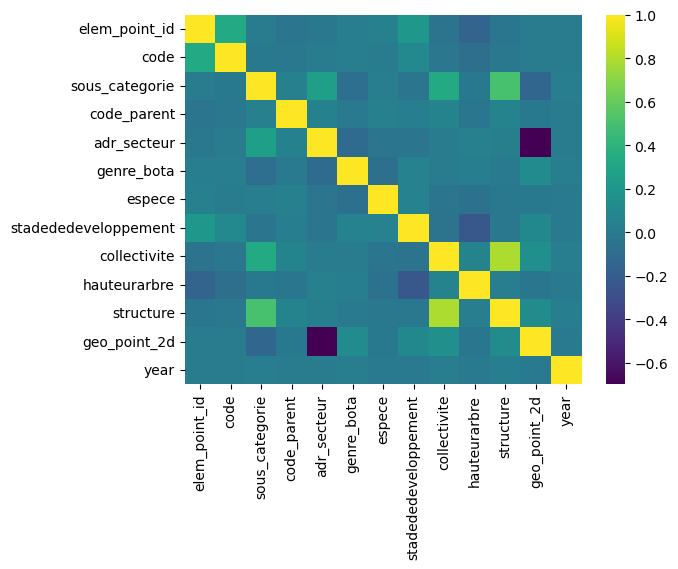

In [45]:
to_corr = X.copy()
to_corr['year'] = y
sns.heatmap(to_corr.corr(),cmap='viridis')

In [46]:
y.head()

0    1965.0
1    1965.0
2    1965.0
3    1965.0
4    1965.0
Name: anneedeplantation, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Select and Train a Model

##### LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 198.43
R^2 Score: 0.31


##### DecisionTreeRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {tree_rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 8.10
R^2 Score: 0.77


##### Cross-Validation

In [51]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [52]:
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=100)
tree_rmse_scores = np.sqrt(-scores)

print(f'min: {min(tree_rmse_scores)}')
print(f'mean: {tree_rmse_scores.mean()}')
print(f'std: {tree_rmse_scores.std()}')

min: 4.219851046795711
mean: 7.610582293705781
std: 1.3627469307754536


In [53]:
scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=100)
lin_rmse_scores = np.sqrt(-scores)

print(f'min: {min(lin_rmse_scores)}')
print(f'mean: {lin_rmse_scores.mean()}')
print(f'std: {lin_rmse_scores.std()}')

min: 11.544056635093217
mean: 14.074457274114003
std: 0.810565690264037


In [93]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {forest_rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 6.07
R^2 Score: 0.87


In [55]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

print(f'min: {min(forest_rmse_scores)}')
print(f'mean: {forest_rmse_scores.mean()}')
print(f'std: {forest_rmse_scores.std()}')

min: 5.712573032899046
mean: 6.081148035361174
std: 0.23156005235728847


In [56]:
pd.Series(forest_rmse_scores).describe()

count    10.000000
mean      6.081148
std       0.244086
min       5.712573
25%       5.967415
50%       6.079659
75%       6.164144
max       6.554827
dtype: float64

In [57]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {svm_rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 14.34
R^2 Score: 0.29


In [58]:
scores = cross_val_score(svm_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)

print(f'min: {min(svm_rmse_scores)}')
print(f'mean: {svm_rmse_scores.mean()}')
print(f'std: {svm_rmse_scores.std()}')

min: 13.724583713476274
mean: 14.398380428498163
std: 0.3557960873014593


In [59]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'learning_rate': 0.5,
    'verbosity': 1
}

xg_reg = xgb.train(params, dtrain, num_boost_round=100)

y_pred = xg_reg.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 6.348400208638945
R² Score: 0.8605979809988415


In [60]:
scores = xgb.cv(params = params, dtrain = dtrain, nfold=10, metrics={'rmse'}, as_pandas=True, seed=42)
# xg_rmse_scores = np.sqrt(-scores)

In [61]:
print(f"mean: {scores['test-rmse-mean'].mean():.2f}")
print(f"std: {scores['test-rmse-mean'].std():.2f}")

mean: 7.69
std: 1.47


## Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 60], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [65]:
RandomForestRegressor(bootstrap=False,max_features=4, n_estimators=10, random_state=42)

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.577411528191114 {'max_features': 2, 'n_estimators': 3}
7.241294923042343 {'max_features': 2, 'n_estimators': 10}
6.893200359669381 {'max_features': 2, 'n_estimators': 30}
6.810684532305179 {'max_features': 2, 'n_estimators': 60}
8.03017163728736 {'max_features': 4, 'n_estimators': 3}
6.919384812314997 {'max_features': 4, 'n_estimators': 10}
6.541409157211983 {'max_features': 4, 'n_estimators': 30}
6.444276933244682 {'max_features': 4, 'n_estimators': 60}
7.566798121349434 {'max_features': 6, 'n_estimators': 3}
6.608742721122681 {'max_features': 6, 'n_estimators': 10}
6.316182183809472 {'max_features': 6, 'n_estimators': 30}
6.2659593419136534 {'max_features': 6, 'n_estimators': 60}
7.582928426780133 {'max_features': 8, 'n_estimators': 3}
6.598734181466907 {'max_features': 8, 'n_estimators': 10}
6.344675580860821 {'max_features': 8, 'n_estimators': 30}
6.282094192015373 {'max_features': 8, 'n_estimators': 60}
7.664788800574968 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}

##### Randomized Search

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [68]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)
cvres = rnd_search.cv_results_

In [69]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.203123420935914 {'max_features': 7, 'n_estimators': 180}
6.505021532385546 {'max_features': 5, 'n_estimators': 15}
6.533392995913755 {'max_features': 3, 'n_estimators': 72}
6.436329563137051 {'max_features': 5, 'n_estimators': 21}
6.226787897627642 {'max_features': 7, 'n_estimators': 122}
6.526594580465515 {'max_features': 3, 'n_estimators': 75}
6.522692575172807 {'max_features': 3, 'n_estimators': 88}
6.294416898614771 {'max_features': 5, 'n_estimators': 100}
6.470372260553781 {'max_features': 3, 'n_estimators': 150}
8.430575500098334 {'max_features': 5, 'n_estimators': 2}


In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.12840443, 0.02829753, 0.03611877, 0.11030229, 0.05712687,
       0.06646707, 0.13644744, 0.0724677 , 0.02002158, 0.15917818,
       0.01972217, 0.16544596])

In [103]:
len(feature_importances)

12

In [105]:
len(X.columns)

12

## extra_attribs

In [102]:
X.head()

,elem_point_id,code,sous_categorie,code_parent,adr_secteur,genre_bota,espece,stadededeveloppement,collectivite,hauteurarbre,structure,geo_point_2d
0,1.063394,0.509433,0.844353,1.633683,0.676272,-0.229747,-1.001792,-0.506894,1.106052,0.962826,1.0926,0.807994
1,1.063984,0.509630,0.844353,-0.497662,0.676272,0.730120,-1.331419,-0.506894,1.106052,-0.105287,1.0926,0.716250
2,1.064279,0.509828,0.844353,-0.497662,0.676272,0.400165,0.316714,3.237112,1.106052,0.962826,1.0926,0.769833
3,1.064869,0.510026,0.844353,1.237752,0.676272,1.360032,-1.054533,3.237112,1.106052,-1.173400,1.0926,0.653572
4,1.065163,0.510223,0.844353,0.636141,0.676272,-1.429581,0.685896,-0.506894,1.106052,0.962826,1.0926,0.659899


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31779 entries, 0 to 31778
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          31779 non-null  int64  
 1   code                   31779 non-null  object 
 2   nom                    31779 non-null  object 
 3   genre                  31779 non-null  object 
 4   genre_desc             31779 non-null  object 
 5   categorie              31779 non-null  object 
 6   categorie_desc         31779 non-null  object 
 7   sous_categorie         31779 non-null  object 
 8   sous_categorie_desc    31779 non-null  object 
 9   code_parent            31779 non-null  object 
 10  code_parent_desc       31779 non-null  object 
 11  adr_secteur            31779 non-null  int64  
 12  bien_reference         31779 non-null  object 
 13  genre_bota             30983 non-null  object 
 14  espece                 29327 non-null  object 
 15  va

In [71]:
data2 = data.copy()

In [72]:
data2.head()

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,27452,ESP29627,AR29627,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP991,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,Tige,Libre,"45.18599541005583,5.736390702744254"
1,27458,ESP29628,AR29628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,NaN,NaN,Ville de Grenoble,NaN,Plus de 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.18535720117796,5.737112737684537"
2,27461,ESP29629,AR29629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.185699673347614,5.7377442387742645"
3,27467,ESP29630,AR29630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP843,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,Libre,Ville de Grenoble,NaN,Libre,"45.184868969286526,5.7364435192678584"
4,27470,ESP29631,AR29631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP614,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,Tige,Libre,"45.18493170028907,5.734850190386917"


In [109]:
data.typenature.describe()

count     13989
unique        7
top       Libre
freq       7942
Name: typenature, dtype: object

In [111]:
data.forme.describe()

count     8603
unique       3
top       Tige
freq      8009
Name: forme, dtype: object

In [178]:
extra_attribs = ['typenature','forme']

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# imputer_num = SimpleImputer(strategy="median")

imputer_cat = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ord', OrdinalEncoder()),
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', imputer_cat, extra_attribs),
])


extra_attribs_pip = pd.DataFrame(preprocessor.fit_transform(data),columns=extra_attribs)

In [179]:
extra_attribs_pip

,typenature,forme
0,-0.429754,0.137895
1,-0.429754,0.137895
2,-0.429754,0.137895
3,-0.429754,0.137895
4,-0.429754,0.137895
...,...,...
31774,-0.429754,0.137895
31775,-0.429754,0.137895
31776,-0.429754,0.137895
31777,2.114740,0.137895


In [379]:
class Adder(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value=0):
        """
        Initialize
        """
        self.fill_value = fill_value

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        # Make a copy of the DataFrame to avoid modifying the original
        data = X.copy()

        # Remove columns with more than 50% missing values
        for col in data.columns:
            if data[col].isnull().sum() >= len(data) / 1.5:
                data = data.drop(col, axis=1)

        # Remove columns with only one unique value
        for col in data.columns:
            if len(data[col].unique()) == 1:
                data = data.drop(col, axis=1)

        # Filter outliers for numerical columns
        for col in data.select_dtypes(include=['int64', 'float64']).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers with NaN
            # data[col] = data[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

        # data['typenature'] = X['typenature']
        # data['forme'] = X['forme']
        data['lat'] = X['geo_point_2d'].map(lambda x: x.split(',')[0])
        data['lon'] = X['geo_point_2d'].map(lambda x: x.split(',')[1])
        data = data.drop('geo_point_2d',axis=1)
        data = data.dropna(subset=['anneedeplantation'])
        
#         # Preparing categorical values
#         le = LabelEncoder()
        
#         for i in data.select_dtypes(include=['object']).columns:
#             data[i] = le.fit_transform(data[i])

        return pd.DataFrame(data)

In [402]:
pipeline_clean = Pipeline([
    ('clean',Adder())
])

X_clean = pipeline_clean.fit_transform(data)
X_clean = X_clean.drop(['code','sous_categorie_desc','code_parent_desc','bien_reference','nom'],axis=1)
y_clean = X_clean.pop('anneedeplantation')

cat_val = [col for col in X_clean.columns if X_clean[col].dtype == 'object']

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent"),cat_val),
    ('ord', OrdinalEncoder(),cat_val),
    ('std_scaler', StandardScaler(),cat_val)
])
# cat_full_pipe = Pipeline([
#     ('cat', cat_pipeline)
# ])
# pipeline_all = Pipeline([
#     ('trans',transline)
# ])

In [398]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29817 entries, 0 to 31778
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   elem_point_id         29817 non-null  int64 
 1   sous_categorie        29817 non-null  object
 2   code_parent           29817 non-null  object
 3   adr_secteur           29817 non-null  int64 
 4   genre_bota            29792 non-null  object
 5   espece                28446 non-null  object
 6   stadededeveloppement  27545 non-null  object
 7   collectivite          29719 non-null  object
 8   hauteurarbre          19788 non-null  object
 9   portarbre             13744 non-null  object
 10  structure             29586 non-null  object
 11  typenature            13744 non-null  object
 12  lat                   29817 non-null  object
 13  lon                   29817 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.4+ MB


In [382]:
cat_val

['code',
 'sous_categorie',
 'code_parent',
 'genre_bota',
 'espece',
 'stadededeveloppement',
 'collectivite',
 'hauteurarbre',
 'portarbre',
 'structure',
 'typenature',
 'lat',
 'lon']

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=0)

In [403]:
X_train_pip = pd.DataFrame(cat_pipeline.fit_transform(X_train))

ValueError: too many values to unpack (expected 2)

In [346]:
y_train_pip = pd.DataFrame(pipeline_clean.fit_transform(y_train)).pop('anneedeplantation')

X = pd.DataFrame(pipeline_all.fit_transform(data), columns=pd.DataFrame(pipeline_clean.fit_transform(data)).drop('anneedeplantation',axis=1).columns)

X = X.drop(['sous_categorie_desc','code_parent_desc','bien_reference','nom'],axis=1)

ValueError: too many values to unpack (expected 2)

In [342]:
X.isnull().sum()

elem_point_id           0
code                    0
sous_categorie          0
code_parent             0
adr_secteur             0
genre_bota              0
espece                  0
stadededeveloppement    0
collectivite            0
hauteurarbre            0
portarbre               0
structure               0
typenature              0
forme                   0
lat                     0
lon                     0
dtype: int64

In [344]:
X.hauteurarbre.sort_values()

19420   -1.388068
19363   -1.388068
19364   -1.388068
19365   -1.388068
19366   -1.388068
           ...   
44       1.084581
29816    1.084581
43       1.084581
29785    1.084581
42       1.084581
Name: hauteurarbre, Length: 29817, dtype: float64

In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31779 entries, 0 to 31778
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          31779 non-null  int64  
 1   code                   31779 non-null  object 
 2   nom                    31779 non-null  object 
 3   genre                  31779 non-null  object 
 4   genre_desc             31779 non-null  object 
 5   categorie              31779 non-null  object 
 6   categorie_desc         31779 non-null  object 
 7   sous_categorie         31779 non-null  object 
 8   sous_categorie_desc    31779 non-null  object 
 9   code_parent            31779 non-null  object 
 10  code_parent_desc       31779 non-null  object 
 11  adr_secteur            31779 non-null  int64  
 12  bien_reference         31779 non-null  object 
 13  genre_bota             30983 non-null  object 
 14  espece                 29327 non-null  object 
 15  va

In [74]:
for col in data2.columns:
    if len(data2[col].unique()) == 1:
        data2 = data2.drop(col, axis=1)
        
for col in data2.columns:
    if data[col].isnull().sum() == len(data2):
        data2 = data2.drop(col, axis=1)
        
for col in data2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data2[col].quantile(0.25)
    Q3 = data2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    data2[col] = data2[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

data2 = data2.set_index('elem_point_id')
data2 = data2.drop(['code','nom','sous_categorie_desc','code_parent_desc','bien_reference'],axis=1)

In [75]:
data2 = data2.dropna(subset=['anneedeplantation'])

In [76]:
data2.describe(include='all')

,sous_categorie,code_parent,adr_secteur,genre_bota,espece,variete,stadededeveloppement,remarques,anneedeplantation,raisondeplantation,...,typeimplantationplu,intituleprotectionplu,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
count,29781,29781,29579.000000,29756,28437,4549,27514,5093,29781.000000,3276,...,5025,594,29683,1896,19764,13722,29550,8464,13722,29781
unique,4,1458,NaN,115,273,215,3,2913,NaN,3,...,4,3,2,2,3,7,4,3,7,29781
top,ESP174,ESP995,NaN,Acer,acerifolia,Austriaca,Arbre adulte,MODIF,NaN,Nouveau,...,Alignement,L 123-1.7,Ville de Grenoble,Alignement,de 10 m à 20 m,Libre,Métropole de Grenoble,Tige,Libre,"45.170609213598304,5.741097829901726"
freq,14545,375,NaN,4913,3722,1110,20745,161,NaN,2888,...,3617,432,15281,1780,9027,7690,14305,7897,7690,1
mean,NaN,NaN,3.818317,NaN,NaN,NaN,NaN,NaN,1990.182062,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.704124,NaN,NaN,NaN,NaN,NaN,17.749025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1944.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,1975.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,1987.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29781 entries, 27452 to 27525
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sous_categorie         29781 non-null  object 
 1   code_parent            29781 non-null  object 
 2   adr_secteur            29579 non-null  float64
 3   genre_bota             29756 non-null  object 
 4   espece                 28437 non-null  object 
 5   variete                4549 non-null   object 
 6   stadededeveloppement   27514 non-null  object 
 7   remarques              5093 non-null   object 
 8   anneedeplantation      29781 non-null  float64
 9   raisondeplantation     3276 non-null   object 
 10  traitementchenilles    2101 non-null   object 
 11  identifiantplu         328 non-null    float64
 12  typeimplantationplu    5025 non-null   object 
 13  intituleprotectionplu  594 non-null    object 
 14  collectivite           29683 non-null  object 
 15  sta

In [78]:
col_num = [i for i in data2.columns if data2[i].dtype == 'float64']
col_cat = [i for i in data2.columns if data2[i].dtype == 'object']

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imputer_num = SimpleImputer(strategy="median")

imputer_cat = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ('imputer_num', imputer_num, col_num),
    ('imputer_cat', imputer_cat, col_cat),
])

imp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

data2_pip = pd.DataFrame(imp_pipeline.fit_transform(data2),columns=col_num+col_cat)

In [79]:
X2 = data2_pip
y2 = data2_pip.pop('anneedeplantation')

In [80]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [81]:
ord_col = ['stadededeveloppement','hauteurarbre']
rest_col = X2.drop(['stadededeveloppement','hauteurarbre'],axis=1)
rest_col = rest_col.drop(['adr_secteur','identifiantplu'],axis=1).columns

In [82]:
full_pipeline = ColumnTransformer([
    ('ord', OrdinalEncoder(),ord_col),
    ('one', OneHotEncoder(sparse_output=True),rest_col)
])

In [83]:
X2_ready = full_pipeline.fit_transform(X2)

In [84]:
scale_pipe = Pipeline([
    ('scale',StandardScaler(with_mean=False))
])

In [85]:
X2_ready = scale_pipe.fit_transform(X2_ready)

In [86]:
X2_ready

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 534134 stored elements and shape (29781, 34799)>

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X2_ready, y2, test_size=0.2, random_state=0)

In [88]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {forest_rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 7.54
R^2 Score: 0.82


In [89]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=2)
forest_rmse_scores = np.sqrt(-scores)

print(f'min: {min(forest_rmse_scores)}')
print(f'mean: {forest_rmse_scores.mean()}')
print(f'std: {forest_rmse_scores.std()}')

min: 8.361286222033645
mean: 8.515612400306729
std: 0.15432617827308448


In [90]:
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 111.49
R^2 Score: 0.65


In [91]:
scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

print(f'min: {min(lin_rmse_scores)}')
print(f'mean: {lin_rmse_scores.mean()}')
print(f'std: {lin_rmse_scores.std()}')

min: 10.867485947979356
mean: 11.019318324521867
std: 0.11104929263756284


## Model Naif

In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elem_point_id         17520 non-null  float64
 1   code                  17520 non-null  float64
 2   sous_categorie        17520 non-null  float64
 3   code_parent           17520 non-null  float64
 4   adr_secteur           17520 non-null  float64
 5   genre_bota            17520 non-null  float64
 6   espece                17520 non-null  float64
 7   stadededeveloppement  17520 non-null  float64
 8   collectivite          17520 non-null  float64
 9   hauteurarbre          17520 non-null  float64
 10  structure             17520 non-null  float64
 11  geo_point_2d          17520 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [97]:
median_y_train = np.median(y_train)

In [98]:
y_pred = np.full_like(y_test, median_y_train)

In [100]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 294.35673515981733
